# CREATE A NEW DATABASE

# Using Python and SQLite
-----------------------------------------

## STEP 1 : Import
Import the SQLIte module. 

In [ ]:
# import 
import sqlite3 as sql

------------------------------------------------------

## STEP 2 : Connect
Connect to a new database. --> SQLIte will create the .db file if it didn't exist before!

- Example Path form for windows:

db_path = r'C:\Users\yourUsername\Documents\CDS302\data\RandomDatabase.db' 

- Example Path form for linux/unix/macos:

db_path = r'/Users/yourUsername/Documents/CDS302/data/RandomDatabase.db' 

##### NOTE: You have to change the above to you own path!!!
The path must exist in your computer.

NOTE 2: The character _r_ in front of the path sting stand for "raw string". It helps us avoid having to put escape characters before special characters, 

such as \ \ for each \ in the path.

In [ ]:
db_path = r'/Users/olga/Documents/TEACHING/CDS302/data/NewDatabase.db'

Create the connection object _conn_ that will handle connections to your new database, through SQLite.

To do this we call the method _connect( )_ of _sqlite3_:

In [ ]:
conn = sql.connect(db_path)

Cool. What type of object is _conn_?

In [ ]:
print( type(conn) )

Nice! Now, this is how we close the connection:

(Reminder: this should be our last step)

In [ ]:
conn.close()

Did you close it? 

Open it again to connect to our new database! 

In [ ]:
conn = sql.connect(db_path)

------------------------------------------------------

## STEP 3 : Create the tables.

Example Schema:

<div>
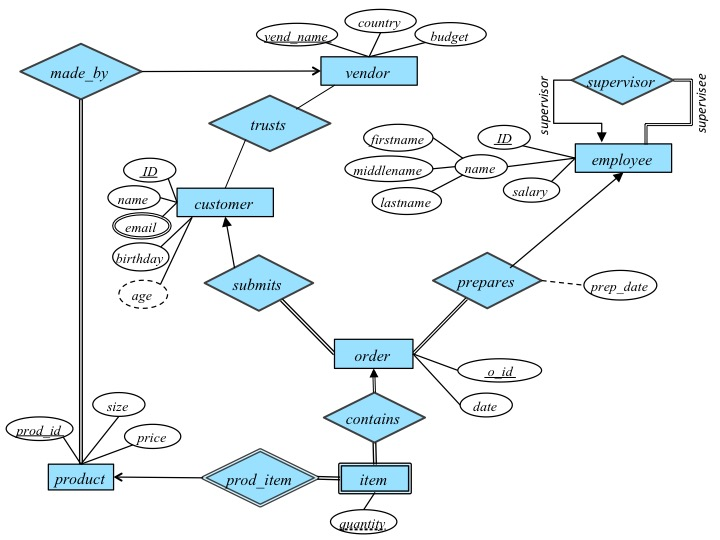
</div>

... that can be reduced into this RELATIONAL SCHEMA:


<div>
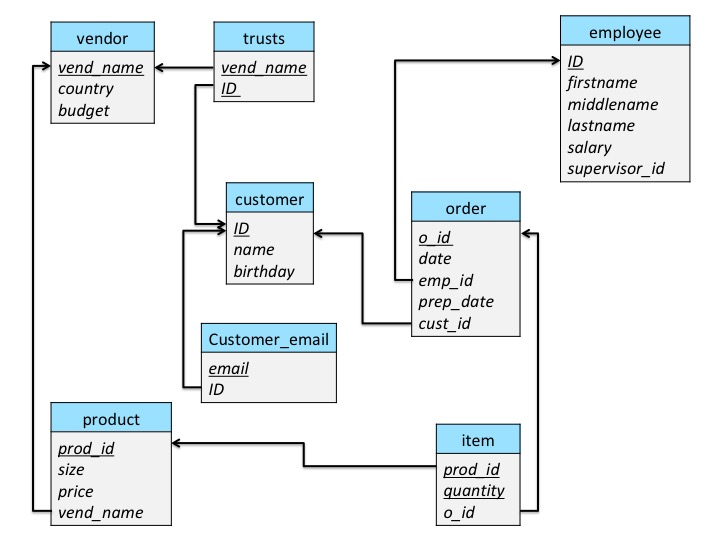
</div>


#### Create Table Vendor

In [ ]:
create_table_query =  'CREATE TABLE vendor ( '
create_table_query += ' vend_ID int, '  
create_table_query += ' vend_name varchar(15), '
create_table_query += ' country varchar(15), '
create_table_query += ' budget numeric(4,0), '
create_table_query += ' primary key (vend_ID) '
create_table_query += ');'

print(create_table_query)

Well, the Relational didn't have an ID for vendor, but we'll create one, autoincrement.

Now, execute the query!

In [ ]:
cursor = conn.execute( create_table_query )

In [ ]:
#cursor = conn.execute( 'DROP TABLE vendor;' )

- Check that it was created, by querying it:

    ##### USE PANDAS TO QUERY THE DB

In [ ]:
import pandas as pd

query = "SELECT * FROM vendor;"

df = pd.read_sql_query(query, conn)

In [ ]:
df

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit()


#### Create Table Customer

In [ ]:
create_table_query =  'CREATE TABLE customer ( '
create_table_query += ' cust_ID int, '  
create_table_query += ' name varchar(15) NOT NULL, '
create_table_query += ' birthday int CHECK ((birthday > 0) AND (birthday <= 31)), ' # Valid day.
create_table_query += ' birthmonth int CHECK ((birthmonth > 0) AND (birthmonth <= 12)), ' # Valid month.
create_table_query += ' birthyear int CHECK (birthyear < 2001), '  # Age over 18.
create_table_query += ' primary key (cust_ID) '
create_table_query += ');'

In [ ]:
print(create_table_query)

Execute the query!

In [ ]:
cursor = conn.execute( create_table_query )

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit()


#### Create Table Trusts

In [ ]:
create_table_query =  'CREATE TABLE trusts ( '
create_table_query += ' cust_ID int NOT NULL, '
create_table_query += ' vend_ID int NOT NULL, '
create_table_query += ' primary key (vend_ID, cust_ID), '
create_table_query += ' foreign key (vend_ID) references vendor ON DELETE NO ACTION, '
create_table_query += ' foreign key (cust_ID) references customer ON DELETE CASCADE'
create_table_query += ');'

print(create_table_query)

Execute the query!

In [ ]:
cursor = conn.execute( create_table_query )

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit()

------------------------------------------------------

## STEP 4 : Insert DATA in the tables.

In [ ]:
insert_data_query = "INSERT INTO vendor VALUES ("
insert_data_query += "1, "
insert_data_query += "'IBM', "
insert_data_query += "'USA', "
insert_data_query += "1000"
insert_data_query += ");"

In [ ]:
print( insert_data_query )

In [ ]:
cursor = conn.execute( insert_data_query )

In [ ]:
insert_data_query = "INSERT INTO vendor VALUES ("
insert_data_query += "2, "
insert_data_query += "'Apple', "
insert_data_query += "'USA', "
insert_data_query += "2000"
insert_data_query += ");"

In [ ]:
print( insert_data_query )

In [ ]:
cursor = conn.execute( insert_data_query )

Let's check that the tuple is inserted.

In [ ]:
query = "SELECT * FROM vendor;"
result = conn.execute( query )

In [ ]:
result

We use the cursor 'result' to FETCH the tuples of the result:

a) Using fetchone( )

In [ ]:
print( result.fetchone() )

That was fun.  Do it again:

In [ ]:
print( result.fetchone() )

In [ ]:
print( result.fetchone() )

or

b) Using fetchall( )

In [ ]:
result = conn.execute( "SELECT * FROM vendor;" )

print( result.fetchall() )

There is another way to run a query using pandas and keep its results in a DataFrame

c) Using pandas

In [ ]:
query = "SELECT * FROM vendor;"
df2 = pd.read_sql_query(query, conn)

df2



Ok... adding all the input manually is not very smart! It takes time.

Let's think of a more efficient way!

First, empty the table:

In [ ]:
conn.execute( 'DELETE FROM vendor;' )

In [ ]:
query = "SELECT * FROM vendor;"
df2 = pd.read_sql_query(query, conn)

df2


Now... let's automate the process.


### Option 1: Generate data randomly

In [ ]:
vendors_list = ['IBM', 'Apple', 'Macintosh', 'Microsoft', 
           'Amazon', 'HP', 'Canon', 'LG', 'Panasonic', 
           'Oracle', 'Intel', 'Dell']

In [ ]:
import random

num_of_vendors = len(vendors_list)

for i in range(num_of_vendors):
    
    # Variable i is auto increment in the loop. That makes it perfect for our id value. 
    vend_ID = str(i) # Must convert it to string to append it to other strings with '+'. 
    
    vend_name = vendors_list[i]
    
    country = "USA"
    
    random_budget = random.randint(1,1000)  # This returns a random integer between 1 and 1000. 
    budget = str(random_budget) # Must convert numbers to strings to append them to other strings with '+'.
    
    insert_data_query = "INSERT INTO vendor VALUES ( " 
    insert_data_query += vend_ID +", "
    insert_data_query += "'" + vend_name +"', "
    insert_data_query += "'" + country +"', "
    insert_data_query += budget
    insert_data_query += ");"
    
    print(insert_data_query)
    
    cursor = conn.execute( insert_data_query )
    

#### Now Let's check if the values were added in vendor:

In [ ]:
query = "SELECT * FROM vendor;"
result = conn.execute( query )

result.fetchall()

#### Wa can use PANDAS to query it. 
The result is the same, but the dataframe looks better visually.
We can observer the attribute names as well.

In [ ]:
import pandas as pd
query = "SELECT * FROM vendor;"
df = pd.read_sql_query(query, conn)
df

You can save this dataframe (i.e., results from table vendor) in a file. For exmaple: 

- a CSV:

In [ ]:
df.to_csv(r'/Users/olga/Documents/TEACHING/CDS302/data/vendors.csv')

- an EXCEL file:

In [ ]:
df.to_excel(r'/Users/olga/Documents/TEACHING/CDS302/data/vendors.xlsx')

### Option 2: Read Data from a file and load it into the table

Let's assume all the vendor data was stored in a file, and we wish to save it as a table in our database.

- Read from a CSV file:

In [ ]:
df2 = pd.read_csv(r'/Users/olga/Documents/TEACHING/CDS302/data/vendors.csv', index_col=0)

df2

Chech that our table _vendor_ is now empty:

In [ ]:
cursor = conn.execute( 'DELETE FROM vendor;' )

In [ ]:
query = "SELECT * FROM vendor;"
result = conn.execute( query )

result.fetchall()

INSERT the data from the DATAFRAME _df2_ to the table _vendor_ :

In [ ]:
df2.to_sql('vendor', con=conn, if_exists='append', index=False)

Chech that our table _vendor_ has the correct tuples:

In [ ]:
query = "SELECT * FROM vendor;"
result = conn.execute( query )

result.fetchall()

- Read from an EXCEL file: 

In [ ]:
df3 = pd.read_excel(r'/Users/olga/Documents/TEACHING/CDS302/data/vendors.xlsx', index_col=0)

df3

... and then we can do the same steps to save the DATAFRAME contents into the sql table as above.

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit()

### Insert data into other tables:

#### CUSTOMER:

In [ ]:
rand_names = ['Liam', 'Emma', 'Noah', 'Olivia', 'William', 'Ava', 'James', 
         'Isabella', 'Oliver', 'Sophia', 'Benjamin', 'Charlotte', 
         'Elijah', 'Mia', 'Lucas', 'Amelia', 'Mason', 'Harper', 
         'Logan', 'Evelyn', 'Alexander', 'Abigail', 'Ethan', 'Emily', 
         'Jacob', 'Elizabeth', 'Michael', 'Mila', 'Daniel', 'Ella', 
         'Henry', 'Avery', 'Jackson', 'Sofia', 'Sebastian', 'Camila', 
         'Aiden', 'Aria', 'Matthew', 'Scarlett', 'Samuel', 'Victoria', 
         'David', 'Madison', 'Joseph', 'Luna', 'Carter', 'Grace', 
         'Owen', 'Chloe', 'Wyatt', 'Penelope', 'John', 'Layla', 'Jack', 
         'Riley', 'Luke', 'Zoey', 'Jayden', 'Nora', 'Dylan', 'Lily', 
         'Grayson', 'Eleanor', 'Isaac', 'Lillian', 'Gabriel', 'Addison', 
         'Julian', 'Aubrey', 'Mateo', 'Ellie', 'Anthony', 'Stella', 
         'Jaxon', 'Natalie', 'Lincoln', 'Zoe', 'Joshua', 'Leah', 
         'Christopher', 'Hazel', 'Andrew', 'Violet', 'Theodore', 'Aurora', 
         'Caleb', 'Savannah', 'Ryan', 'Audrey', 'Asher', 'Brooklyn', 'Nathan', 
         'Bella', 'Thomas', 'Claire', 'Leo', 'Skylar', 'Nolan', 'Naomi']

In [ ]:
len(rand_names)

In [ ]:
# Generate 20 random customers:

for i in range(20):
    
    # Variable i is auto increment in the loop. That makes it perfect for our id value. 
    cust_ID = str(i) # Must convert it to string to append it to other strings with '+'. 
    
    num_of_names = len(rand_names)
    j = random.randint(0, num_of_names-1)
    name = rand_names[j]
    
    random_day = random.randint(1,28)  # To avoid checking months of 30, 31, etc., all days are 1-28. 
    birthday = str(random_day) # Must convert numbers to strings to append them to other strings with '+'.

    random_month = random.randint(1,12)   
    birthmonth = str(random_month) 
    
    random_year = random.randint(1950,2000)   # Age >18
    birthyear = str(random_year) 

    insert_data_query = "INSERT INTO customer VALUES ( " 
    insert_data_query += cust_ID + ", "
    insert_data_query += "'" + name + "', "
    insert_data_query += birthday + ", "
    insert_data_query += birthmonth + ", "
    insert_data_query += birthyear
    insert_data_query += ");"
    
    print(insert_data_query)
    try:
        cursor = conn.execute( insert_data_query )
    except:
        print(insert_data_query + " was not executed.")

#### TRUSTS:

In [ ]:
query = "SELECT vend_ID FROM vendor;"
result = conn.execute( query )

vend_IDs = result.fetchall()
print(vend_IDs)

In [ ]:
query = "SELECT cust_ID FROM customer;"
result = conn.execute( query )

cust_IDs = result.fetchall()
print(cust_IDs)

In [ ]:
# Generate 50 random trust relatioships:

for i in range(50):
    
    rand_vend = random.randint(0,11)   
    vend_ID = str(rand_vend) # Must convert numbers to strings to append them to other strings with '+'.

    rand_cust = random.randint(0,19)   
    cust_ID = str(rand_cust) 

    insert_data_query = "INSERT INTO trusts VALUES ( " 
    insert_data_query += cust_ID + ", "
    insert_data_query += vend_ID
    insert_data_query += ");"
    
    try:
        cursor = conn.execute( insert_data_query )
        print(insert_data_query)
    except:
        print("Already exists:", cust_ID, vend_ID)

In [ ]:
query = "SELECT count(*) FROM trusts;"
result = conn.execute( query )

result.fetchall()

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit()

------------------------------------------------------

## STEP 5 : Query the database.

### Query 1
Make a query string.  Submit it to the database.

In [ ]:
query = 'SELECT count(*) ' 
query +='FROM vendor NATURAL JOIN trusts NATURAL JOIN customer;'
result = conn.execute( query )

### Get the Result
Use __fetchone__

In [ ]:
print( result.fetchone() )

## Now your Turn to practice!

Q1. Write a query that returns the customer name and the vendor name, for those vendors that are trusted by customers.

    SELECT DISTINCT name, vend_name FROM vendor NATURAL JOIN trusts NATURAL JOIN customer;

   Submit it to the database.
    
   Print the result.

In [ ]:
result = 

In [ ]:
print(  )

Q2. Write a query that returns: 

the customer name, birthday, month, year, and the vendor budget, 

for those vendors that are trusted by customers, 

and the trusting customer was born either in December or in June, 

ordered by the budget value.

   Submit it to the database.
    
   Print the result.

In [ ]:
query4 =  '  '
query4 += '  '
query4 += '  '
query4 += '  '

print(query4)

In [ ]:
df4 = pd.read_sql_query(query4, conn)

df4

Q2. Write a query that returns: 

the customer name, birthday, month, year, and the  SUM of vendor budgets tusted per customer, 

for those vendors that are trusted by customers, having SUM of budgets > 100,

and the trusting customer was born either in December or in June. 

   Submit it to the database.
    
   Print the result.

In [ ]:
query =  ' '
query += ' '
query += ' '
query += ' '

print(query)

In [ ]:
df = _________________

df

## STEP 6 : EDIT THE TABLES

### VENDOR : 
#### Add columns for latitude and longitude:

In [ ]:
# lat
alter_query = 'ALTER TABLE vendor ADD COLUMN lat REAL;'
cursor = conn.execute( alter_query )

In [ ]:
# lon
alter_query = 'ALTER TABLE vendor ADD COLUMN lon REAL;'
cursor = conn.execute( alter_query )

In [ ]:
df = pd.read_sql_query('SELECT * FROM vendor;', conn)
df

#### Insert values in latitude and longitude:

In [ ]:
# There are 12 vendors
for i in range(len(df)):
    lat = random.uniform(-117, -75)
    lon = random.uniform(32, 40)
    
    update_query  = 'UPDATE vendor SET '
    update_query += 'lat = ' + str(lat) + ', '
    update_query += 'lon = ' + str(lon) + ' '
    update_query += 'WHERE vend_id = ' + str(i) + ';'
    
    print(update_query)
    cursor = conn.execute( update_query )

In [ ]:
df = pd.read_sql_query('SELECT * FROM vendor;', conn)
df

SQL CODE:

UPDATE vendor 
SET lat=10.0, lon=20.0
WHERE vend_id = 0;

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit()

### CUSTOMER : 
#### Add columns for latitude and longitude:

In [ ]:
# lat
query = 'ALTER TABLE customer ADD COLUMN clat REAL;'
cursor = conn.execute( query )

In [ ]:
# lon
query = 'ALTER TABLE customer ADD COLUMN clon REAL;'
cursor = conn.execute( query )

In [ ]:
df = pd.read_sql_query('SELECT * FROM customer;', conn)
df

#### Insert values in latitude and longitude:

In [ ]:
# There are 19 customers
for i in range(len(df)):
    # Generate random coordinates
    clat = random.uniform(-117, -75)
    clon = random.uniform(32, 40)
    
    # Round them to a precision of 3 decimal digits
    clat = round(clat, 3)
    clon = round(clon, 3)
    
    # Create the update query
    update_query  = 'UPDATE customer SET '
    update_query += 'clat = ' + str(clat) + ', '
    update_query += 'clon = ' + str(clon) + ' '
    update_query += 'WHERE cust_id = ' + str(i) + ';'
    
    # Print the query
    print(update_query)
    
    # Execute the query
    cursor = conn.execute( update_query )

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit()

### TRUSTS : 
#### Add a new column  'distance'. 

In [ ]:
# distance
query_dist = ' ALTER TABLE trusts ADD COLUMN distance REAL;'
cursor = conn.execute(query_dist);

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit();

Query: What are the names and locations of customers, and vendors that are connected through a trust relation?

In [ ]:
query =  'SELECT name, clat, clon, vend_name, lat, lon '
query += 'FROM vendor NATURAL JOIN trusts NATURAL JOIN customer '
df = pd.read_sql_query(query, conn)

df.head()

### Calculate the distance between vendor locations and customer locations:


SQL does not have a square root function -- but python does! :)

Write a funtion that calculates distance. For simplicity, use Eucleidian.

In [ ]:
import math

def eucl_dist(xa, ya, xb, yb): 
    distance = math.sqrt((xa-xb)**2 + (ya-yb)**2)
    return distance

It's better to use harvesine distance. It assumes the earth is a sphere and returns the distance in km:

In [ ]:
from math import sin, cos, sqrt, atan2, radians
def harvesine_dist(lat1, lon1, lat2, lon2):

    R = 6373.0 # approximate radius of earth in km

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance


Get the Coordinates of all the customers and all the vendors in separate lists.

In [ ]:
import numpy as np

cLats = np.array(df['clat'])
cLons = np.array(df['clon'])

vLats = np.array(df['lat'])
vLons = np.array(df['lon'])

In [ ]:
cLats

Find out how many tuples in table _trust_ there are in total.

In [ ]:
query = 'SELECT COUNT(*) FROM trusts;'
result = conn.execute( query )
trust_size = result.fetchall()

print(type(trust_size))
print(trust_size[0])
print(trust_size[0][0])

Create a loop, to calculate each of the distances, for every tuple in _trusts_.

In [ ]:
dist_list = []
for i in range(trust_size[0][0]):
    dist = harvesine_dist(cLats[i], cLons[i], vLats[i], vLons[i])
    dist_list.append(dist)
    
print( dist_list )

Load all tuples from _trusts_ in a dataframe (in memory):

In [ ]:
query =  'SELECT * FROM trusts; '
df2 = pd.read_sql_query(query, conn)

df2.head()

Append a column to the dataframe, with the correposnding distances that we calculated:

In [ ]:
df2['distance'] = dist_list

df2.head()

###### Note: The above dataframe is in the memory. Just because we changed it does not mean that there were any changed in the database.
###### The TABLE _trusts_ has NOT cahnged yet!

-

###### Now, let's store this result back in the database, in the table _trusts_:

In [ ]:
df2.to_sql('trusts', con=conn, if_exists='replace', index=False)

Check to see that the tuples of the table are updated correctly:

In [ ]:
query =  'SELECT * FROM trusts; '
df2 = pd.read_sql_query(query, conn)

df2.head()

COMMIT YOUR CHANGES TO THE DATABASE!

In [ ]:
conn.commit()

## STEP 7 : Close the DB Connection

It is wise to always close the connection in the end:

In [ ]:
# But we are not done, yet... so keep it open for now.
#conn.close()

## VISUALIZATION: Plot the customers - vendors pairs on the map.

In [ ]:
import folium
from folium import plugins

Dataframe with the result of the joins:

In [ ]:
query =  'SELECT * '
query += 'FROM vendor NATURAL JOIN trusts NATURAL JOIN customer '
df = pd.read_sql_query(query, conn)

df.head()

Create an empty map. 

In [ ]:
folium_map = folium.Map(location=[37.0902, -95.7129],  # USA coordinates
                            zoom_start=4,
                            tiles="openstreetmap")

folium_map

Show all VENDORS on the map. 

Size of circle ~ Budget.

In [ ]:
for index, row in df.iterrows():
    
    #add pop up
    popup_text = """{}, {}, {}"""

    popup_text = popup_text.format(row['vend_name'],
                               row['budget'],
                               row['country'])
    #size
    radius= row['budget']/100  
    #color
    color= 'orange'
    
    # add marker to the map 
    folium.CircleMarker(location= (row['lon'], row['lat']), weight=1, radius=radius, 
                        color=color, fill=True, fill_color= color, popup= popup_text).add_to(folium_map)

folium_map

Show all CUSTOMERS on the map. 

Size of circle ~ Age.

In [ ]:
for index, row in df.iterrows():
    
    #add pop up
    popup_text = """{}, {}/{}/{}"""

    popup_text = popup_text.format(row['name'],
                               row['birthmonth'],
                               row['birthday'],
                               row['birthyear'])
    #size
    radius= (2019 - row['birthyear'])/10  
    #color
    color= 'green'
    
    # add marker to the map 
    folium.CircleMarker(location= (row['clon'], row['clat']), weight=1, radius=radius, 
                        color=color, fill=True, fill_color= color, popup= popup_text).add_to(folium_map)

folium_map

Show the TRUSTS relationship:

In [ ]:
for index, row in df.iterrows():
    p1 = [row['clon'], row['clat']]
    p2 = [row['lon'], row['lat']]
    folium.PolyLine(locations=[p1, p2], opacity=0.4, weight = 2, color='blue').add_to(folium_map)

folium_map

## Finally : Close the DB Connection

It is wise to always close the connection in the end:

In [ ]:
conn.close()